In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

## IMAGE

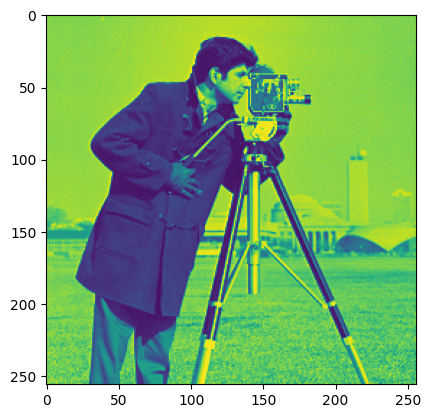

In [2]:
original_image = cv2.imread('cameraman.bmp', 0)
plt.imshow(original_image)

### Applying bilateral filter (brute force)

In [3]:
def spatial_gaussian_kernel(x, y, sigma_s):
    return np.exp(-((x**2 + y**2) / (2 * sigma_s**2)))

def range_gaussian_kernel(img1, img2, sigma_r):
    return np.exp(- (((img1 - img2)**2) / (2 * sigma_r**2)))


In [4]:
def bilateral_filter(image, d, sigma_s, sigma_r):
    height, width = image.shape
    filtered_image = np.zeros((height, width), dtype=image.dtype)

    for i in range(height):
        for j in range(width):
            total_weight = 0.0
            weighted_sum = 0.0

            for k in range(-d // 2, d // 2 + 1):
                for l in range(-d // 2, d // 2 + 1):
                    ni, nj = i + k, j + l

                    if (0 <= ni < height) and (0 <= nj < width):
                        spatial_weight = spatial_gaussian_kernel(k, l, sigma_s)
                        range_weight = range_gaussian_kernel(image[i, j], image[ni, nj], sigma_r)

                        weight = spatial_weight * range_weight
                        weighted_sum += image[ni, nj] * weight
                        total_weight += weight

            filtered_image[i, j] = weighted_sum / total_weight

    return filtered_image

In [5]:
original_image.shape

(256, 256)

/tmp/ipykernel_75487/1358252324.py:5: RuntimeWarning: overflow encountered in scalar subtract
  return np.exp(- (((img1 - img2)**2) / (2 * sigma_r**2)))


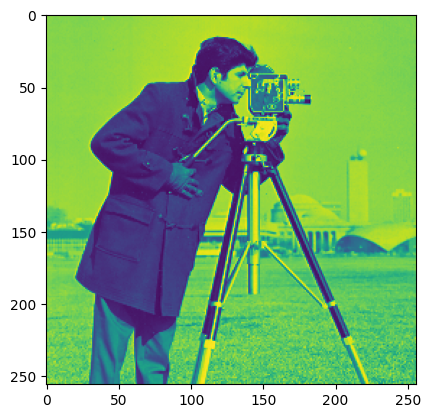

In [6]:
gray_filtered = bilateral_filter(original_image, d=3, sigma_s=1, sigma_r=5)
plt.imshow(gray_filtered)

### Applying bilateral filter with separable kernel

In [7]:
import numpy as np
import cv2

def separable_bilateral(image, d, sigma_s, sigma_r):
    height, width = image.shape
    filtered_image = np.zeros_like(image, dtype=image.dtype)

    # Apply bilateral filter along rows
    for i in range(height):
        for j in range(width):
            total_weight = 0.0
            weighted_sum = 0.0

            for k in range(-d // 2, d // 2 + 1):
                nj = j + k

                if 0 <= nj < width:
                    spatial_weight = np.exp(-(k**2) / (2 * sigma_s**2))
                    range_weight = np.exp(-((image[i, j] - image[i, nj])**2) / (2 * sigma_r**2))

                    weight = spatial_weight * range_weight
                    weighted_sum += image[i, nj] * weight
                    total_weight += weight

            filtered_image[i, j] = weighted_sum / total_weight
    

    # Apply bilateral filter along columns
    for j in range(width):
        for i in range(height):
            total_weight = 0.0
            weighted_sum = 0.0

            for k in range(-d // 2, d // 2 + 1):
                ni = i + k

                if 0 <= ni < height:
                    spatial_weight = np.exp(-(k**2) / (2 * sigma_s**2))
                    range_weight = range_gaussian_kernel(image[i, j], image[ni, j], sigma_r)

                    weight = spatial_weight * range_weight
                    weighted_sum += filtered_image[ni, j] * weight
                    total_weight += weight

            filtered_image[i, j] = weighted_sum / total_weight

    return filtered_image


/tmp/ipykernel_75487/2966452499.py:19: RuntimeWarning: overflow encountered in scalar subtract
  range_weight = np.exp(-((image[i, j] - image[i, nj])**2) / (2 * sigma_r**2))


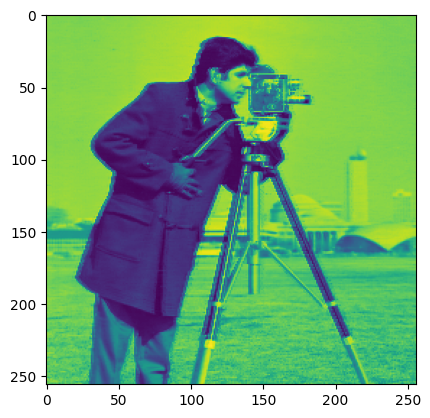

In [10]:

gray_filtered_separable = separable_bilateral(original_image, d=5, sigma_s=5, sigma_r=70)
plt.imshow(gray_filtered_separable)

In [9]:
cv2.imwrite('cameraman_filtered_separable.jpg', gray_filtered_separable)

True

sigma_s
Controls the spatial extent of the filter.
Larger values result in a wider spatial neighborhood, which may lead to more smoothing across larger regions of the image.
Smaller values preserve finer details but may not smooth out noise as effectively.

sigma_r
Controls the range of pixel values over which filtering occurs.
Larger values allow more dissimilarity in pixel values, resulting in less smoothing across regions with varying intensities.
Smaller  values make the filter more sensitive to small intensity differences, potentially leading to more aggressive smoothing.